In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sarracen as src
import numpy as np

# Initial Setup

In [21]:
sdf = src.read_csv('../Data/results/kelvin_helmholtz/245.csv')
sdf.params={'mass':0.00075}
sdf

,x,y,vx,vy,u,h,rho
0,0.877074,0.002512,-0.498873,0.021773,3.712534,0.027340,0.963221
1,0.964265,0.751198,0.011800,0.005349,3.496338,0.024371,1.212184
2,0.874754,0.028342,-0.504228,0.017111,3.665345,0.026932,0.992669
3,0.914671,0.773427,-0.203707,0.025697,3.409240,0.026174,1.050952
4,0.880268,0.051960,-0.506705,0.012188,3.694908,0.026145,1.053322
...,...,...,...,...,...,...,...
2995,0.108096,0.652071,0.480143,0.002435,1.873866,0.048000,2.000291
2996,0.104361,0.673716,0.434502,0.015476,1.869314,0.048000,1.991083
2997,0.101933,0.686319,0.418833,-0.018853,1.875860,0.048000,1.983671
2998,0.074017,0.723024,0.273767,-0.004064,1.787103,0.048000,1.840382


<Axes: xlabel='x', ylabel='y'>

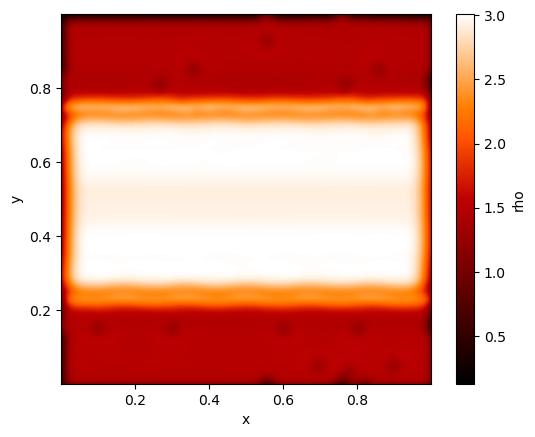

In [22]:
sdf.render('rho', xsec=1.0)

# Final Setup

In [23]:
sdft = src.read_csv('../Data/results/kelvin_helmholtz/240.csv')
sdft

,x,y,vx,vy,u,h,rho
0,0.879574,0.002392,-0.501146,0.026748,3.705990,0.027376,0.960679
1,0.964213,0.751247,0.008914,-0.024230,3.514089,0.024279,1.221436
2,0.877282,0.028256,-0.507072,0.017518,3.664313,0.026937,0.992255
3,0.915692,0.773400,-0.205111,-0.014823,3.440428,0.025997,1.065362
4,0.882804,0.051905,-0.507899,0.009090,3.691651,0.026162,1.051928
...,...,...,...,...,...,...,...
2995,0.105693,0.652048,0.480991,0.006684,1.870849,0.048000,1.995448
2996,0.102183,0.673616,0.436728,0.024395,1.864404,0.048000,1.983235
2997,0.099832,0.686397,0.421647,-0.012381,1.869865,0.048000,1.974091
2998,0.072644,0.723027,0.275467,0.003342,1.786430,0.048000,1.839357


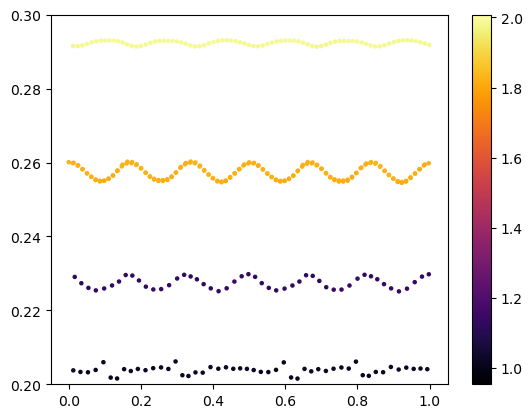

In [25]:
plt.scatter(sdft['x'], sdft['y'], c=sdft['rho'], cmap='inferno', s=5)
plt.colorbar()
plt.ylim(0.2, 0.3)
plt.show()

# Angular Momentum's Conservation

In [12]:
# Angular Momentum
def angular_momentum(x, y, vx, vy):
    return x*vy - y*vx

In [13]:
T = 30
time = range(0, T)
ang_mom = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/kelvin_helmholtz/' + str(ii) + ".csv")
    df.params={'mass': 2.0/df.shape[0]}
    ang_mom[ii-1] = np.sum(angular_momentum(df['x'], df['y'], df['vx'], df['vy']))

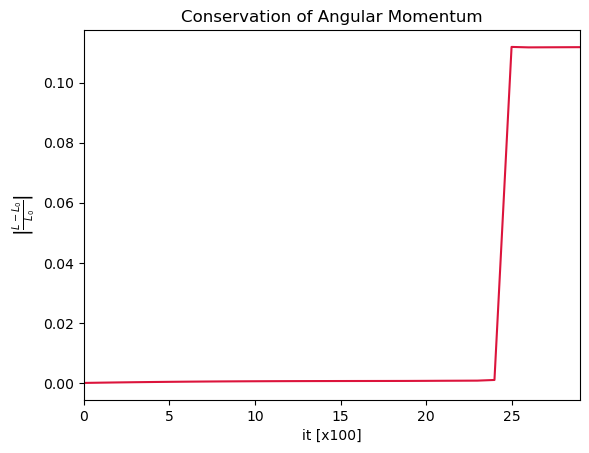

In [17]:
plt.plot(time[:], np.abs((ang_mom[:]-ang_mom[0])/ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{L-L_0}{L_0}\right|$")
plt.xlim(0, T-1)
plt.show()

# Conservation of Energy

In [18]:
# Energy
def energy(vx, vy, u):
    return 0.5*(vx*vx + vy*vy)+u

In [19]:
energ = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/kelvin_helmholtz/' + str(ii) + ".csv")
    energ[ii-1] = np.sum(energy(df['vx'], df['vy'], df['u']))

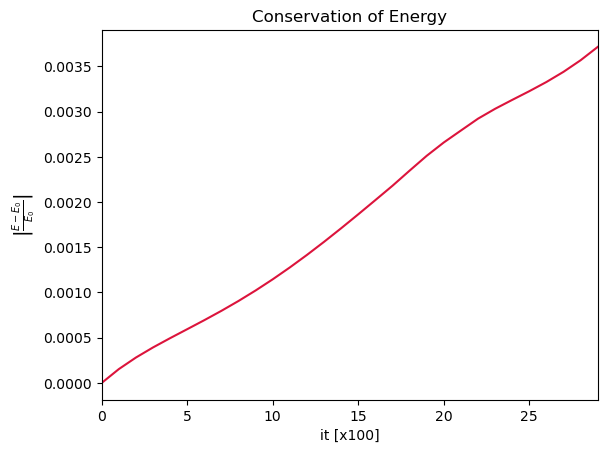

In [20]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='crimson')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T-1)
plt.show()